# Week 8
# CNN and RNN

**Big thank you to Professor Liang Zhao much of the material in this workbook**

## I. Tensorflow.keras

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as K
print(tf.__version__)

2.14.0


In [2]:
model = K.models.Sequential([
    K.layers.Flatten(input_shape=(28, 28)),
    K.layers.Dense(128, input_shape=(784,), activation='relu'),
    K.layers.Dense(10)
])

In [17]:
model = K.models.Sequential()
model.add(K.layers.Flatten(input_shape=(28, 28)))
model.add(K.layers.Dense(128, input_shape=(784,), activation='relu'))
model.add(K.layers.Dense(10))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
# Load FashionMNIST data
fashion_mnist = K.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, test_images.shape)

train_images = train_images / 255.0
test_images = test_images / 255.0

(60000, 28, 28) (10000, 28, 28)


### If we use 90/10 spit with batch size 32, what is the batch size?

In [22]:
60000 * 0.9 / 32

1687.5

In [23]:
history1 = model.fit(train_images, train_labels, batch_size=32, epochs=10, verbose=1,
          validation_split=0.1,
          )

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5076 - accuracy: 0.8195 - val_loss: 0.3925 - val_accuracy: 0.8567
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3795 - accuracy: 0.8621 - val_loss: 0.3729 - val_accuracy: 0.8680
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3381 - accuracy: 0.8770 - val_loss: 0.3634 - val_accuracy: 0.8628
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3130 - accuracy: 0.8851 - val_loss: 0.3218 - val_accuracy: 0.8833
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.8908 - val_loss: 0.3189 - val_accuracy: 0.8855
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2785 - accuracy: 0.8975 - val_loss: 0.3207 - val_accuracy: 0.8868
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.9002 - val_loss: 0.3146 - val_accuracy

<Axes: >

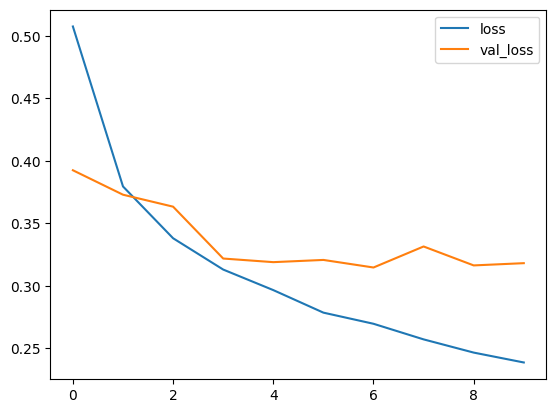

In [24]:
new_dict = {'loss':history1.history['loss'], 'val_loss':history1.history['val_loss']}
pd.DataFrame(new_dict).plot()

In [13]:
scores = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3826 - accuracy: 0.8798


In [10]:
print("Test loss: {:.3f}".format(scores[0]))
print("Test accuracy: {:.3f}".format(scores[1]))

Test loss: 0.345
Test accuracy: 0.879


In [11]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, verbose=1,
                    validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2337 - accuracy: 0.9140 - val_loss: 0.3195 - val_accuracy: 0.8887
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2258 - accuracy: 0.9156 - val_loss: 0.3376 - val_accuracy: 0.8840
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2192 - accuracy: 0.9182 - val_loss: 0.3478 - val_accuracy: 0.8858
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2123 - accuracy: 0.9199 - val_loss: 0.3299 - val_accuracy: 0.8868
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2071 - accuracy: 0.9227 - val_loss: 0.3388 - val_accuracy: 0.8837
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2019 - accuracy: 0.9249 - val_loss: 0.3330 - val_accuracy: 0.8870
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1936 - accuracy: 0.9280 - val_loss: 0.3572 - val_accuracy:

<Axes: >

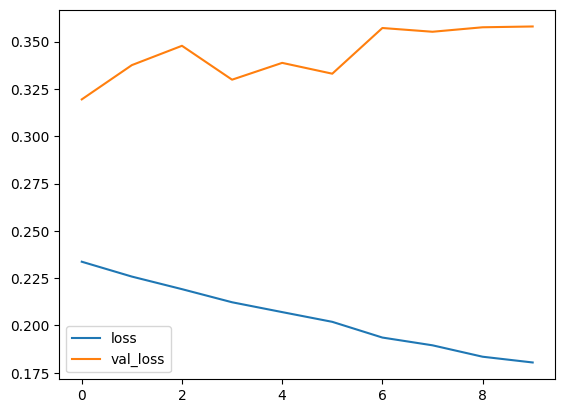

In [16]:
new_dict = {'loss':history.history['loss'], 'val_loss':history.history['val_loss']}
pd.DataFrame(new_dict).plot()

<Axes: >

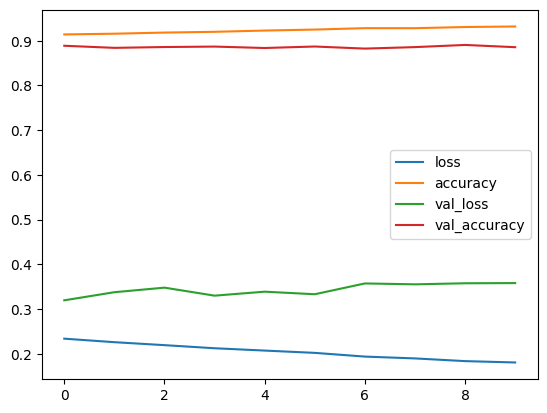

In [12]:
pd.DataFrame(history.history).plot()

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=128):
    model = K.models.Sequential([
        K.layers.Flatten(input_shape=(28, 28)),
        K.layers.Dense(hidden_size, input_shape=(784, ), activation='relu'),
        K.layers.Dense(10)
    ])
    model.compile(optimizer=optimizer,
                  loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)
param_grid = {'epochs': [1, 5, 10],
              'hidden_size': [32, 64, 256]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(train_images, train_labels)

375/375 [==============================] - 1s 1ms/step - loss: 0.4846 - accuracy: 0.8301
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5625 - accuracy: 0.8080
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4302 - accuracy: 0.8504
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3915 - accuracy: 0.8627
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3703 - accuracy: 0.8687
Epoch 5/5
375/375 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8609
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5563 - accuracy: 0.8099
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4133 - accuracy: 0.8554
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3792 - accuracy: 0.8647
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3554 - accuracy: 0.8739
Epoc

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000022C57141430>,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]})

In [ ]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=['param_epochs', 'param_hidden_size'],
                values=[ 'split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','mean_test_score'])

mean_test_score  split0_test_score  \
param_epochs param_hidden_size                                       
1            32                        0.837983           0.846250   
             64                        0.848783           0.847917   
             256                       0.849250           0.858500   
5            32                        0.864400           0.860917   
             64                        0.874500           0.876417   
             256                       0.884683           0.887167   
10           32                        0.873833           0.873333   
             64                        0.878917           0.878583   
             256                       0.888467           0.884500   

                                split1_test_score  split2_test_score  \
param_epochs param_hidden_size                                         
1            32                          0.837000           0.821417   
             64                          0.847417           0.857250   
             256                         0.846833           0.856250   
5            32                          0.865417           0.860583   
             64                          0.869500           0.879250   
             256                         0.884500           0.890833   
10           32                          0.866417           0.879917   
             64                          0.876750           0.880083   
             256                         0.882833           0.893250   

                                split3_test_score  split4_test_score  
param_epochs param_hidden_size                                        
1            32                          0.850417           0.834833  
             64                          0.847417           0.843917  
             256                         0.854583           0.830083  
5            32                          0.866917           0.868167  
             64                          0.876083           0.871250  
             256                         0.881583           0.879333  
10           32                          0.875250           0.874250  
             64                          0.886667           0.872500  
             256                         0.888167           0.893583

## II. Convolutional Neural Networks

### Ideas
- Dense layers may contain redudent connections
- Some information should be invariant to spacial translation
- The number of parameters can be reduced if certain weights share the same value.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS4LZdFg5QPbgDb-jvP-YT0N51eRkWg45uF0ybsB5k0Ubr0-gOC&usqp=CAU" width="400">

## Definition of Convolution

**Continous convolution**: The convolution of two real-valued function $f, g$ is a function defined as
$$(f*g)(x) := \int_{-\infty}^\infty f(t)g(x-t)dt$$

<img src="https://i.stack.imgur.com/oJ5Za.png" width="300"><img src="https://fiveko.com/assets/pics/math/gauss1d_shape.jpg" width="300">

**Discrete convolution**: The convolution of two sequence $\{f[n]\}_{n=-\infty}^\infty$ and $\{g[n]\}_{n=-\infty}^\infty$ is a sequence defined as
$$(f*g)[n] := \sum_{t=-\infty}^\infty f[t]g[n-t]$$


## 2D Convolution Layer
<img src="https://cdn-media-1.freecodecamp.org/images/Gjxh-aApWTzIRI1UNmGnNLrk8OKsQaf2tlDu" width="600">

**2D smoothing with Gaussian kernel**

<img src="https://www.cs.umd.edu/class/fall2016/cmsc426/matlab/filters/html/filters_tutorial_03.png" width="400"><img src="https://www.mathworks.com/help/examples/stats/win64/ComputeTheMultivariateNormalPdfExample_01.png" width="200">

**Edge detection**

<img src="https://x-wei.github.io/images/Ng_DLMooc_c4wk1/pasted_image004.png" width="400">

## LeNet5 on MNIST

Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner proposed a neural network architecture for handwritten and machine-printed character recognition in 1990’s which they called LeNet-5. It is one of the early example of a convolutional neural network

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png" width="600">

Reference:

LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

## Max-Pooling Layer
<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" width="500">

In [25]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [29]:
(9*6+1)*16

880

In [27]:
model_cnn = tf.keras.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(filters=6,
                                 kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))

model_cnn.add(tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3, 3),
                                 activation='relu'))

model_cnn.add(tf.keras.layers.AveragePooling2D())

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(units=120,
                       activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units=84,
                       activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units=10,
                       activation='softmax'))

In [28]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 12, 12, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 120)               276600    
                                                                 
 dense_10 (Dense)            (None, 84)                10164     
                                                      

In [ ]:
model_cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model_cnn.fit(x_train.reshape(list(x_train.shape) + [1]), y_train, epochs=10)

Epoch 1/10


C:\Users\burd8\Anaconda3\envs\py38\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 19s 10ms/step - loss: 0.1562 - accuracy: 0.9531
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0492 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0329 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0162 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0081 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.00

In [ ]:
model_cnn.evaluate(x_test.reshape(list(x_test.shape) + [1]), y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9888


[0.05030299350619316, 0.9887999892234802]

## Discussion: How to evaluate this model?

## Recurrent Neural Network

### Idea
- In some applications, data arrive in a sequence.
- The model should remember the history.

<img src="https://www.tensorflow.org/text/tutorials/images/text_generation_training.png" width="700">

## Text Generation with a Recurrent Neurual Network
- We will work with a dataset of Shakespeare's writing
- Build a model with `tf.keras` to analyze the sequence of characters
- Apply the model to write new text in Shakespeare's style

This project is adapted from [TensorFlow tutorial](https://www.tensorflow.org/tutorials/sequences/text_generation)

In [ ]:
# Get the text file from:
# https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


In [ ]:
# Read the text as a string
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [ ]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [ ]:
# The unique characters in the file
# Python set is a data structure containing unique elements
vocab = sorted(set(text))
# Print with formatted string: {index:format}
print ('{} unique characters'.format(len(vocab)))

65 unique characters


### Vectorize the text

In [ ]:
# Creating a mapping from unique characters to indices
# enumerate: returns index and the value
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [ ]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [ ]:
# Show how the first 13 characters from the text are mapped to integers
# repr: string representation of an object
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'First Citizen' ---- characters mapped to int ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


In [ ]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//seq_length

# Create training examples / targets
# Dataset.from_tensor_slices(): convert a numpy array to tf Dataset
# Dataset.take(): create a sub Dataset
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


In [ ]:
# batch(): cut the dataset into chunks
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

# join(): concatenate a list of elements and form a string
for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [ ]:
# For each sequence, duplicate and shift it to form the input and target text by using the `map` method
# to apply a simple function to each batch
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [ ]:
# Print the first example input and target values:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


Each index of these vectors are processed as one time step. For the input at time step 0, the model receives the index for "F" and trys to predict the index for "i" as the next character. At the next timestep, it does the same thing but the RNN considers the previous step context in addition to the current input character.

In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 18 ('F')
  expected output: 47 ('i')
Step    1
  input: 47 ('i')
  expected output: 56 ('r')
Step    2
  input: 56 ('r')
  expected output: 57 ('s')
Step    3
  input: 57 ('s')
  expected output: 58 ('t')
Step    4
  input: 58 ('t')
  expected output: 1 (' ')


In [ ]:
# Create training batches
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

### Build the model

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [ ]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           16640     
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense (Dense)                (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [ ]:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Input: 
 "used:\nMy brother Gloucester, plain well-meaning soul,\nWhom fair befal in heaven 'mongst happy souls!"

Next Char Predictions: 
 'OWkUBZEUUS$oU s?FaHPIdMip&\nn3 nLeWhdvqWnv-L;jMGZLDBeMt$zQ.cCjL!eRezcwLzVhEqBMutWaNDMsiLvioUU-oYz:Ku3'


In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.17439


In [ ]:
model.compile(optimizer='adam', loss=loss)

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
EPOCHS=10

history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/10
172/172 [==============================] - 12s 69ms/step - loss: 2.6875
Epoch 2/10
172/172 [==============================] - 12s 68ms/step - loss: 1.9653
Epoch 3/10
172/172 [==============================] - 12s 69ms/step - loss: 1.7006
Epoch 4/10
172/172 [==============================] - 12s 69ms/step - loss: 1.5502
Epoch 5/10
172/172 [==============================] - 12s 69ms/step - loss: 1.4600
Epoch 6/10
172/172 [==============================] - 12s 69ms/step - loss: 1.4000
Epoch 7/10
172/172 [==============================] - 12s 70ms/step - loss: 1.3527
Epoch 8/10
172/172 [==============================] - 12s 70ms/step - loss: 1.3145
Epoch 9/10
172/172 [==============================] - 12s 70ms/step - loss: 1.2790
Epoch 10/10
172/172 [==============================] - 12s 70ms/step - loss: 1.2457


In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
print(generate_text(model, u"ROMEO: "))

ROMEO: shall hence at her
Buside friends of place withal.
Welcomely as I day goods; 'They upon your chamber. Come,
Thou given tyrann: thy sovereign's language,
Not like the head, you arrived in thine,
Now still of England's dishope more than you.

PETRUCHIO:
So, sir, it says, sweet bark all lible.

HENRY BOLINGBROKE:
Uthen thou art solries; he fightest mine:
Stepiou stook with her for ill-upon us.

BRUTUS:
The days, my father, too,
When he forced to the Gody be as springed
Thy widonoow: thing watch'd hishorn.
Thus even so I think, are you.

LUCIO:
I have crafted you with dishonour dead,
But he hath in cir him than in think it presemenish'd
Young Richard that weter-full thine,
your mother with oriel house extee swift in her,
Shit much on, here comes it to die:
Y then will your good he from the lowe I should
What I have made, than if the stepher,
Carting, for our friends, Richmond.

LEONTES:
So all use is all his negless.

POLIXENES:
Your grace seizs so you then must I am. To help thee t